In [399]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [342]:
#Load Data
file_path = r"Data\Prediction_Datasets.xlsx"

# Load data from the specified Excel sheet
data = pd.read_excel(file_path, sheet_name='Churn')

In [343]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

### Exploratory Data Analysis

In [345]:
# Summary statistics
data.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Age,6007.0,47.289163,16.805110,18.000000,33.000000,47.000000,60.000000,84.000000
Number_of_Referrals,6007.0,7.439820,4.622369,0.000000,3.000000,7.000000,11.000000,15.000000
Tenure_in_Months,6007.0,17.394540,10.592920,1.000000,8.000000,17.000000,27.000000,36.000000
Monthly_Charge,6007.0,65.087598,31.067808,-10.000000,35.950001,71.099998,90.449997,118.750000
Total_Charges,6007.0,2430.986173,2267.481295,19.100000,539.949982,1556.849976,4013.900024,8684.799805
Total_Refunds,6007.0,2.038612,8.065520,0.000000,0.000000,0.000000,0.000000,49.790001
Total_Extra_Data_Charges,6007.0,7.015149,25.405737,0.000000,0.000000,0.000000,0.000000,150.000000
Total_Long_Distance_Charges,6007.0,797.283311,854.858840,0.000000,107.084999,470.220001,1269.839966,3564.719971
Total_Revenue,6007.0,3233.246020,2856.181081,21.610001,833.684998,2367.149902,5105.685059,11979.339844


In [346]:
# Drop leakey columns
data.drop(columns = ["Churn_Category", "Churn_Reason" ], inplace = True)

In [347]:
# Check for high cardinality in the categorical columns
data.select_dtypes("object").nunique()

Customer_ID               6007
Gender                       2
Married                      2
State                       22
Value_Deal                   5
Phone_Service                2
Multiple_Lines               2
Internet_Service             2
Internet_Type                3
Online_Security              2
Online_Backup                2
Device_Protection_Plan       2
Premium_Support              2
Streaming_TV                 2
Streaming_Movies             2
Streaming_Music              2
Unlimited_Data               2
Contract                     3
Paperless_Billing            2
Payment_Method               3
Customer_Status              2
dtype: int64

In [348]:
# Identifying target column
data['Customer_Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [349]:
# Map 'Stayed' to 0 and 'Churned' to 1
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [350]:
#Convert the data type to numerical
data['Customer_Status'].astype(int)

0       0
1       0
2       1
3       1
4       0
       ..
6002    0
6003    0
6004    1
6005    0
6006    0
Name: Customer_Status, Length: 6007, dtype: int64

In [351]:
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['Value_Deal', 'Internet_Type'], dtype='object')

In [352]:
# Check for null
null_percentages = (data.isna().sum() / len(data)) * 100
null_percentages = null_percentages[null_percentages > 1].sort_values(ascending=False)
null_percentages


Value_Deal       54.885966
Internet_Type    20.359580
dtype: float64

In [353]:
data['Value_Deal'].value_counts()

Value_Deal
Deal 2    758
Deal 5    578
Deal 4    540
Deal 1    469
Deal 3    365
Name: count, dtype: int64

In [354]:
data['Internet_Type'].value_counts()

Internet_Type
Fiber Optic    2675
DSL            1398
Cable           711
Name: count, dtype: int64

In [355]:
# Fill NaN with None
#data[null_columns] = data[null_columns].map(lambda x: None if pd.isnull(x) else x)

In [356]:
# Replace None with 'Not subscribed'
for col in null_columns:
    data[col] = data[col].replace(np.nan, 'Not Subscribed')

In [357]:
data.isna().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
dtype: int

In [358]:
data.head(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,Not Subscribed,Yes,Yes,...,Two Year,No,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,0
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Month-to-Month,Yes,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,0


### Data Analysis and Visualization

In [359]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status'],
      dtype='object')

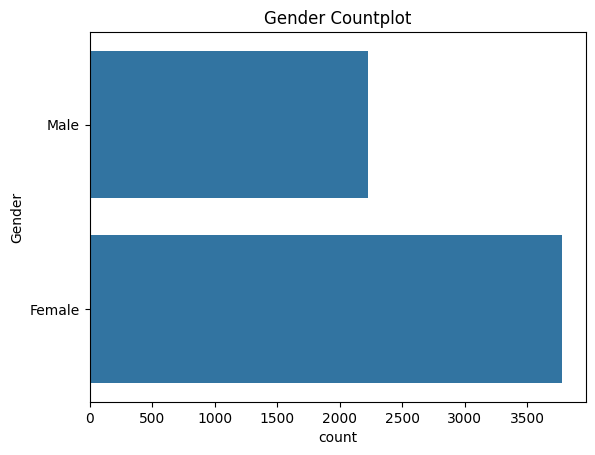

In [360]:
sns.countplot(data['Gender'])
plt.title('Gender Countplot');

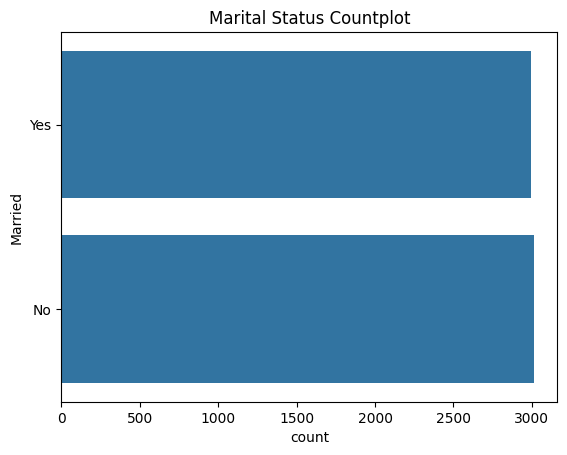

In [361]:
sns.countplot(data['Married'])
plt.title('Marital Status Countplot');

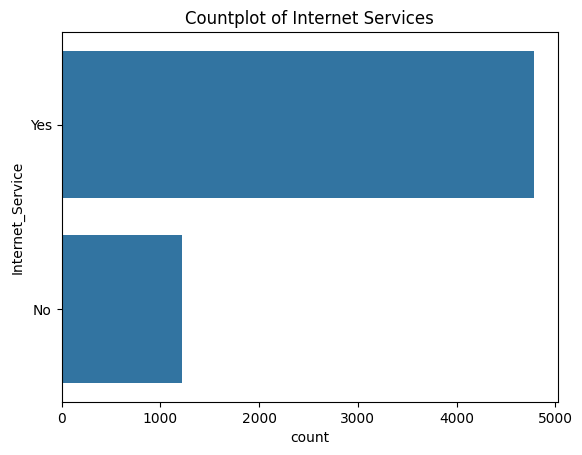

In [362]:
sns.countplot(data['Internet_Service'])
plt.title('Countplot of Internet Services');

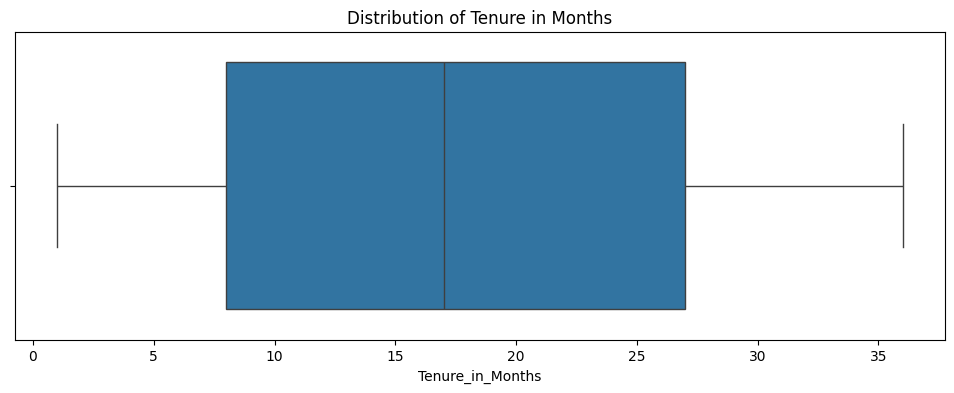

In [363]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data,x ="Tenure_in_Months")
plt.title('Distribution of Tenure in Months');

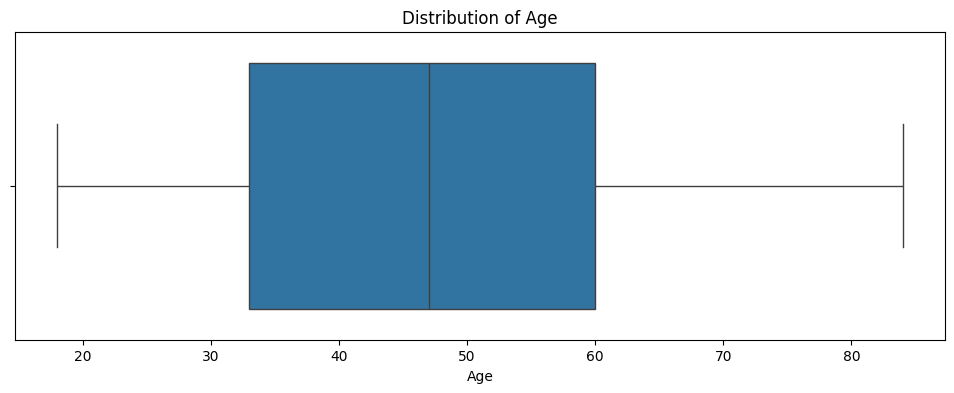

In [364]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x="Age")
plt.title('Distribution of Age');

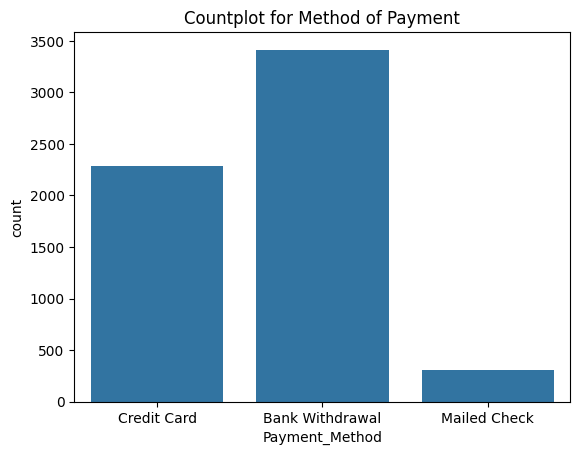

In [365]:
sns.countplot(data=data, x='Payment_Method')
plt.title('Countplot for Method of Payment');

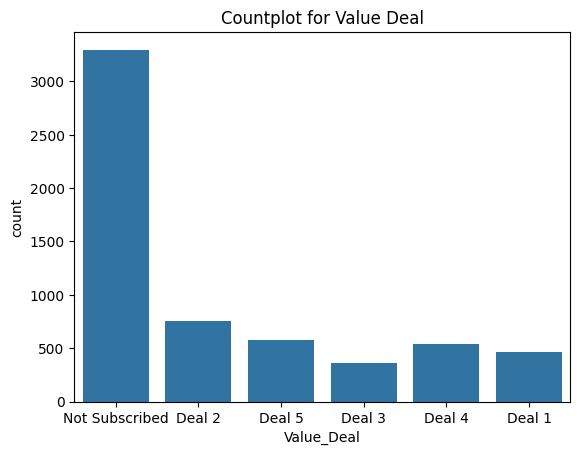

In [366]:
sns.countplot(data=data,x='Value_Deal')
plt.title('Countplot for Value Deal');

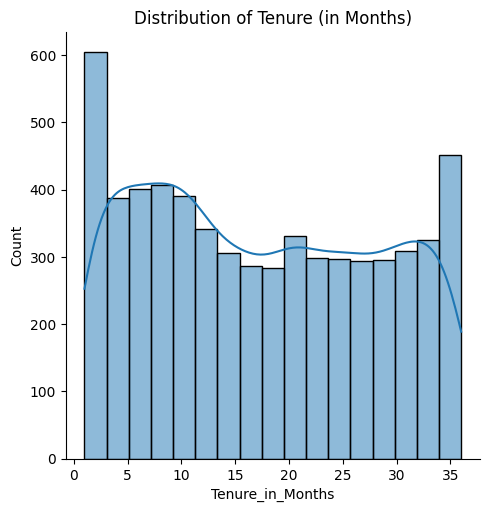

In [367]:
sns.displot(data= data, x='Tenure_in_Months' , kde= True)
plt.title('Distribution of Tenure (in Months)');

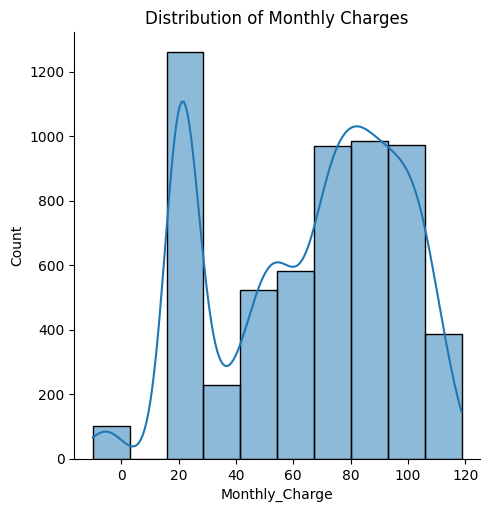

In [368]:
sns.displot(data= data, x='Monthly_Charge' ,bins =10, kde= True)
plt.title('Distribution of Monthly Charges');

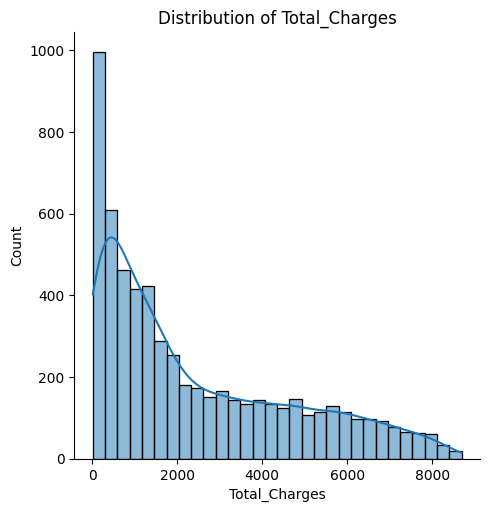

In [369]:
sns.displot(data= data, x='Total_Charges' ,bins=30, kde= True)
plt.title('Distribution of Total_Charges');

In [370]:
correlation_matrix = data.select_dtypes("number").corr()

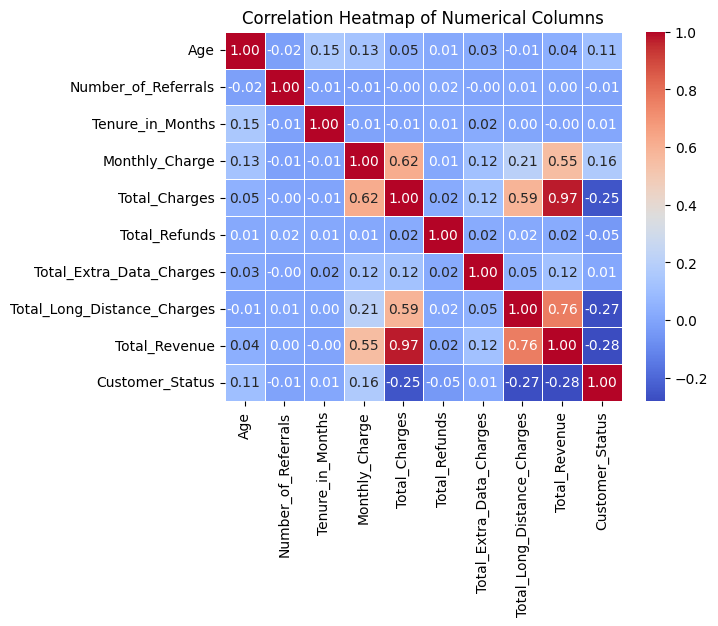

In [371]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns');

Total Revenye and Total Charges have high correlation thus one of the columns need to be dropped

In [372]:
data.drop(columns =['Total_Charges'], inplace = True)

### Feature Engineering

In [373]:
""" 
Group some of the numerical features into bins
- Age
- Tenure
- Monthly Charge
"""


' \nGroup some of the numerical features into bins\n- Age\n- Tenure\n- Monthly Charge\n'

In [374]:
# Define age bins and labels
age_bins = [0, 30, 45, 60, 100]
age_labels =  ['18-30', '31-45', '46-60', '61+']

# Create Age Group column
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [375]:
# Define tenure bins and labels
tenure_bins = [0, 6, 12, 24, 36, 60]
tenure_labels = ['New', 'Short-term', 'Mid-term', 'Long-term', 'Very Long-term']

# Create Tenure Category column
data['Tenure_Category'] = pd.cut(data['Tenure_in_Months'], bins=tenure_bins, labels=tenure_labels, right=False)


In [376]:
# Define bins and labels
bins = [0, 40, 80, 120, 200]  # Define bin edges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define bin labels

# Create Monthly Charge Category column
data['Charge_Category'] = pd.cut(data['Monthly_Charge'], bins=bins, labels=labels, right=True)

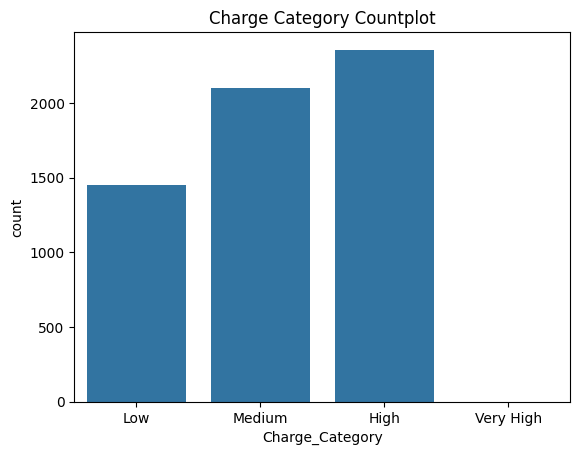

In [377]:
sns.countplot(data=data, x= 'Charge_Category')
plt.title('Charge Category Countplot');

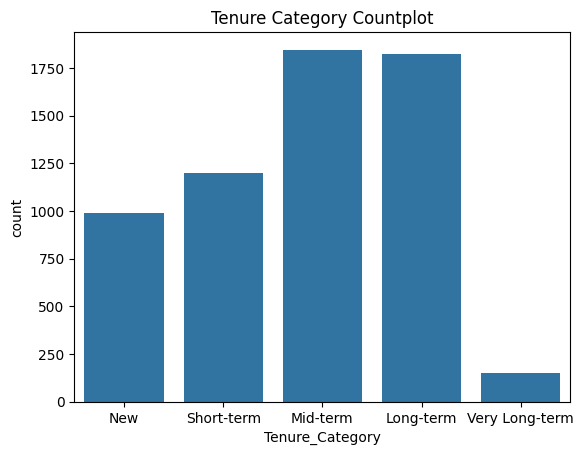

In [378]:
sns.countplot(data=data, x= 'Tenure_Category')
plt.title('Tenure Category Countplot');

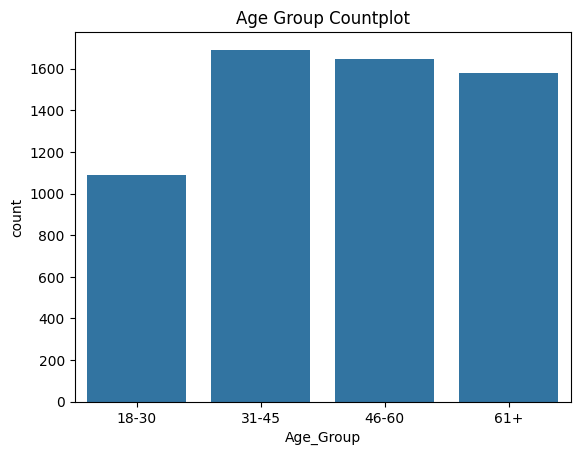

In [379]:
sns.countplot(data=data, x= 'Age_Group')
plt.title('Age Group Countplot');

In [380]:
data_1=data.copy()

In [381]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Customer_ID                  6007 non-null   object  
 1   Gender                       6007 non-null   object  
 2   Age                          6007 non-null   int64   
 3   Married                      6007 non-null   object  
 4   State                        6007 non-null   object  
 5   Number_of_Referrals          6007 non-null   int64   
 6   Tenure_in_Months             6007 non-null   int64   
 7   Value_Deal                   6007 non-null   object  
 8   Phone_Service                6007 non-null   object  
 9   Multiple_Lines               6007 non-null   object  
 10  Internet_Service             6007 non-null   object  
 11  Internet_Type                6007 non-null   object  
 12  Online_Security              6007 non-null   object  
 13  Onl

In [382]:
data_1.drop(columns =['Age','Tenure_in_Months','Monthly_Charge'], inplace= True)

In [383]:
#Drop the customer_ID colum
data_1.drop(columns = ['Customer_ID'], inplace = True)

In [384]:
#Encoding of categorical features
label_encoders = {}

for col in data_1.select_dtypes(include =["category", "object"]).columns.to_list():
    le = LabelEncoder()
    data_1[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [385]:
# #Define target and feature columns
y = data_1['Customer_Status']
X = data_1.drop(columns=['Customer_Status']).copy()

In [388]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [389]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [400]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [401]:
# Train classifiers and evaluate
results = {}

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

In [402]:
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")


--- Logistic Regression ---
Accuracy: 0.8153
Confusion Matrix:
[[738  78]
 [144 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       816
           1       0.76      0.63      0.69       386

    accuracy                           0.82      1202
   macro avg       0.80      0.77      0.78      1202
weighted avg       0.81      0.82      0.81      1202



--- Random Forest ---
Accuracy: 0.8469
Confusion Matrix:
[[774  42]
 [142 244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       816
           1       0.85      0.63      0.73       386

    accuracy                           0.85      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.85      0.85      0.84      1202



--- Support Vector Classifier ---
Accuracy: 0.8295
Confusion Matrix:
[[755  61]
 [144 242]]
Classification Report:
              p

Random forest has the best accuracy of 84.69

### Hyperparameter Tuning


In [427]:
# Random Forest Model
rf = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', 
                           verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [428]:
# Model Evaluation
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Best Model: {accuracy:.4f}")
print(f"Confusion Matrix" ,confusion_matrix(y_test, y_pred))  
print(f"Classification Report",classification_report(y_test, y_pred))      

Accuracy of Best Model: 0.8453
Confusion Matrix [[778  38]
 [148 238]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.95      0.89       816
           1       0.86      0.62      0.72       386

    accuracy                           0.85      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.85      0.85      0.84      1202



### Feature Importances


In [429]:
rf_model =RandomForestClassifier()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

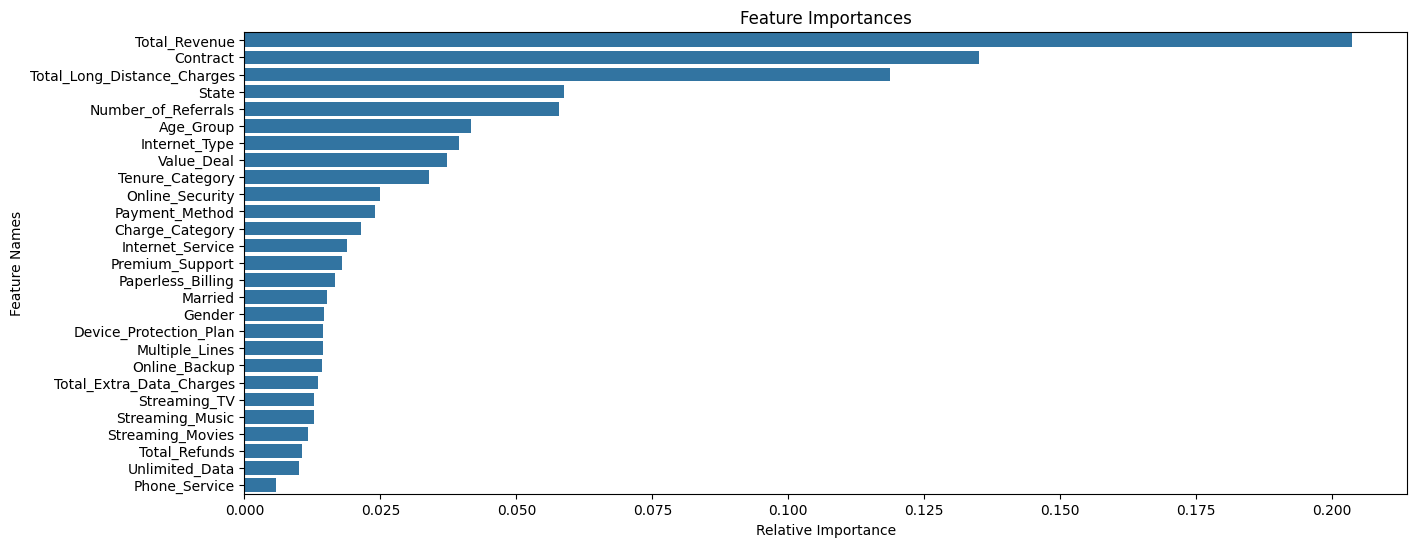

In [430]:
# Plot the feature importances

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names');

In [431]:
feature_names = X.columns

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)



In [432]:
# Top 7 important features
importance_df['Feature'][:7]

0                  Total_Revenue
1                       Contract
2    Total_Long_Distance_Charges
3                          State
4            Number_of_Referrals
5                      Age_Group
6                  Internet_Type
Name: Feature, dtype: object

### Save Model

In [433]:
#joblib.dump(best_rf, "model.pkl")

['model.pkl']